# Семинар 1 - Основы работы с OpenCV, фильтр Байера, сжатие/расжатие изображений

***

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IMG_PATH = "data/Lenna_test_image.jpeg"

if not Path(IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2025.git
    !mv cv_course_2024/seminars/seminar_01/data .

# 1. Основы работы с OpenCV

## Чтение, отображение и сохранение изображений

Для чтения изображения из файла используется функция `cv2.imread`, для отображения изображения на экране - функция `cv2.imshow`, для сохранения изображения в файл - функция `cv2.imwrite`.

`cv2.imread(path, flag)` - читает изображение из файла по пути path. Флаг flag определяет формат считывания изображения. Возможные значения флага:
- `cv2.IMREAD_COLOR` - считывание изображения в цвете (значение по умолчанию, можно не указывать в явном виде)
- `cv2.IMREAD_UNCHANGED` - считывание изображения в цвете "как есть" (с альфа-каналом, если он есть)
- `cv2.IMREAD_GRAYSCALE` - считывание изображения в оттенках серого

In [3]:
img = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR)  # cv2.IMREAD_COLOR обычно не указывают, так как это значение по умолчанию

`cv2.imshow("window_name", image)` - отображает изображение img в окне с именем window_name. Если окно с таким именем не существует, то оно будет создано. Если окно существует, то оно будет очищено и в нем будет отображено изображение img.

Пример кода:
```python
import cv2

img = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
cv2.imshow("image", img)
cv2.waitKey(0)  # ожидание нажатия клавиши, иначе окно закроется сразу же
cv2.destroyAllWindows()  # закрытие всех окон
```

Однако это работает только в скриптах при наличии GUI. Пример такого скрипта: [show_image.py](show_image.py)

В Jupyter Notebook для отображения изображения используется функция `plt.imshow`.

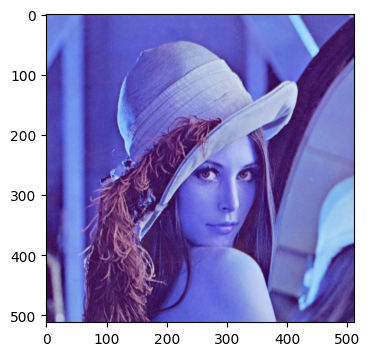

In [4]:
plt.figure(figsize=[4, 4])
plt.imshow(img);

Как видно, цвета изображения неправильные. **Функция `cv2.imread` считывает изображения в формате BGR** (blue, green, red). Чтобы перейти к более привычному представлению RGB (reg, green, blue), который ожидает matplotlib, можно воспользоваться встроенной функцией cvtColor:

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

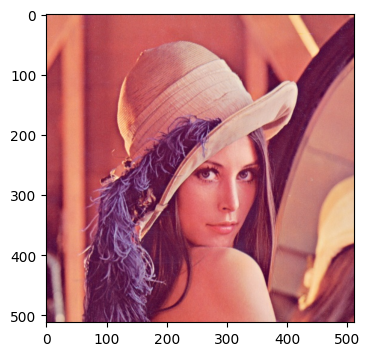

In [6]:
plt.figure(figsize=[4, 4])
plt.imshow(img_rgb);

## Работа с изображением

Загруженное цветное изображение является обычным numpy массивом с тремя размерностями (`shape` - (H, W, C), **channel-last**), каждый элемент которого - целое беззнаковое 8-ми битное число, представляющее квантованную на 256 уровней интенсивность одного из цветов:

In [7]:
print('type(img_rgb) = ', type(img_rgb))
print('img_rgb.shape = ', img_rgb.shape)
print('img_rgb.dtype = ', img_rgb.dtype)

type(img_rgb) =  <class 'numpy.ndarray'>
img_rgb.shape =  (512, 512, 3)
img_rgb.dtype =  uint8


Над изображением можно выполнять те же операции, что и над обычным массивом. Например, рассчитать статистики:

In [8]:
print('img_rgb.min() = ', img_rgb.min())
print('img_rgb.max() = ', img_rgb.max())
print('img_rgb.mean() = ', img_rgb.mean())
print('img_rgb.std() = ', img_rgb.std())
print('np.median(img_rgb) = ', np.median(img_rgb))

img_rgb.min() =  0
img_rgb.max() =  255
img_rgb.mean() =  128.22198232014975
img_rgb.std() =  58.942859735329606
np.median(img_rgb) =  119.0


присвоить какое-либо значение блоку(пикселю):

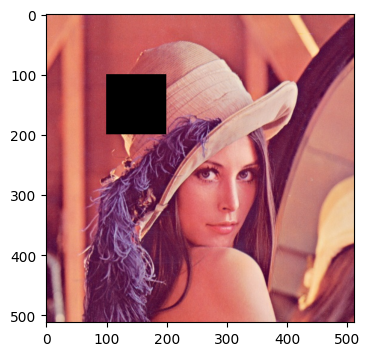

In [9]:
img_rgb_2 = img_rgb.copy()
img_rgb_2[100:200, 100:200] = 0

plt.figure(figsize=[4, 4])
plt.imshow(img_rgb_2);

прибавить какое-либо значение блоку(пикселю):

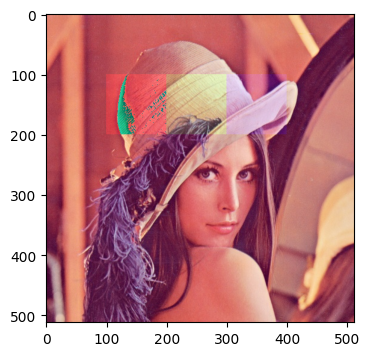

In [10]:
img_rgb_3 = img_rgb.copy()
img_rgb_3[100:200, 100:200, 0] += 40
img_rgb_3[100:200, 200:300, 1] += 40
img_rgb_3[100:200, 300:400, 2] += 40

plt.figure(figsize=[4, 4])
plt.imshow(img_rgb_3);

### Вопрос

- Что произошло с цветами на изображении img_rgb_3? Почему так произошло?

## Альтернативы OpenCV

1. Библиотека `Pillow` (Python Imaging Library, PIL). В OpenCV изображения представляются в виде матриц, а в Pillow - в виде объектов класса `Image`.

In [11]:
from PIL import Image

img_pil = Image.open(IMG_PATH)
print('type(img_pil) = ', type(img_pil))
print('img_pil.size = ', img_pil.size)
print('img_pil.mode = ', img_pil.mode)

type(img_pil) =  <class 'PIL.JpegImagePlugin.JpegImageFile'>
img_pil.size =  (512, 512)
img_pil.mode =  RGB


2. Библиотека `scikit-image`. Изображения представлены в виде `np.ndarray`. Порядок каналов - **сразу RGB**. `shape` - (H, W, C), **channel-last**.

type(img_ski) =  <class 'numpy.ndarray'>
img_ski.shape =  (512, 512, 3)
img_ski.dtype =  uint8


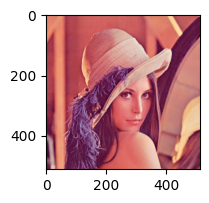

In [12]:
import skimage as ski

img_ski = ski.io.imread(IMG_PATH)
print('type(img_ski) = ', type(img_ski))
print('img_ski.shape = ', img_ski.shape)
print('img_ski.dtype = ', img_ski.dtype)

plt.figure(figsize=[2, 2])
plt.imshow(img_ski);

3. `torchvision` - библиотека для работы с изображениями, входящая в состав PyTorch. Изображения представлены в виде `torch.Tensor`. Порядок каналов - **сразу RGB**. `shape` - (C, H, W), **channel-first**.

In [13]:
from torchvision.io import read_image  # читает изображение сразу в формате torch.Tensor

img_torch = read_image(IMG_PATH)
print('type(img_torch) = ', type(img_torch))
print('img_torch.shape = ', img_torch.shape)
print('img_torch.dtype = ', img_torch.dtype)

type(img_torch) =  <class 'torch.Tensor'>
img_torch.shape =  torch.Size([3, 512, 512])
img_torch.dtype =  torch.uint8


4. **DALI** - библиотека для быстрой обработки изображений на GPU. Подробнее: https://developer.nvidia.com/blog/rapid-data-pre-processing-with-nvidia-dali/

## Упражнения

### Упражнение 1: BGR -> RGB
Реализуйте функцию преобразования изображения в формате BGR в формат RGB

In [16]:
def convert_color_bgr_to_rgb(img_bgr: np.ndarray) -> np.ndarray:
    pass

In [17]:
assert((img_rgb == convert_color_bgr_to_rgb(img)).all())

### Упражнение 2: Изменение яркости
Одним из простейших преобразований изображения является изменение уровня яркости, задаваемое следующим образом:

$$
f'(x, y) = \alpha f(x, y) + \beta
$$

Реализуйте данную операцию с помощью `cv2.convertScaleAbs` - [туториал](https://docs.opencv.org/4.x/d3/dc1/tutorial_basic_linear_transform.html).

В данном упражнении необходимо исследовать работу функции при различных значениях параметров. Протестируйте разные значения alpha и beta, например $\alpha \in \set{0.8, 1, 1.2, 2}$, $\beta \in \set{-10, 0, 10}$

In [ ]:
alpha = 2
beta = -10

img_new = ...

plt.figure(figsize=[4, 4])
plt.imshow(img_new);

### Упражнение 3: Смешивание изображений $\alpha - blend$

Другим простым преобразованием является смешивание двух изображений, задаваемое как:

$$
    f'(x, y) = \alpha f_1(x, y) + (1 - \alpha) f_2(x, y)
$$

Реализуйте данную операцию с помощью `cv2.addWeighted` - [туториал](https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html).

Вы можете использовать изображение `data/opencv_logo.jpeg` или загрузить свое.


In [ ]:
alpha = 0.7
beta = 1 - alpha

logo = cv2.imread('data/opencv_logo.jpeg')[..., ::-1]

img_new = ...

plt.figure(figsize=[4, 4])
plt.imshow(img_new);

## Нанесение текста и фигур

С помощью OpenCV можно добавить дополнительные элементы на изображение, такие как текст, простые геометрические фигуры и т.д. (см. https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)

In [14]:
TEXT = 'Lenna 0.99'
UL_CORNER = (200, 200)  # верхний левый угол
FONT = 0                # шрифт
SCALE = 1               # размер
COLOR = (0, 255, 0)     # цвет - зеленый
THICKNESS = 2           # толщина линий

img_rgb_4 = img_rgb.copy()

cv2.putText(img_rgb_4, TEXT, UL_CORNER, FONT, SCALE, COLOR, THICKNESS)
cv2.rectangle(img_rgb_4, UL_CORNER, (370, 400), COLOR, THICKNESS);

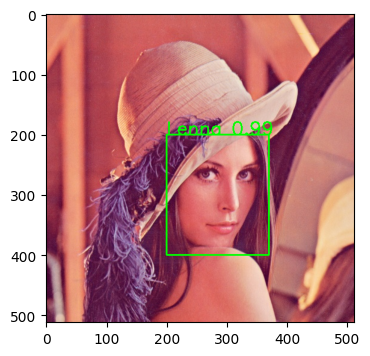

In [15]:
plt.figure(figsize=[4, 4])
plt.imshow(img_rgb_4);

### Вопрос

- Зачем может понадобиться рисовать на изображении?

# 2. Фильтр Байера

Сырые изображения, приходящие с камеры, являются байеризованными. Они представлены в виде двумерного массива, где отдельные пиксели кодируют интенсивность синего, зеленого, красного цветов. 

![Фильтр Байера](data/bayer.jpeg)


## Домашнее задание (опциональное)

В ноутбуке [`demosaicing.ipynb`](demosaicing.ipynb).

Вспомогательные материалы - [слайды](slides_demosaicing.pdf).


# 3. Сжатие/расжатие изображений

Изображения в формате JPEG являются сжатыми изображениями и на диске могут занимать существенно меньше места, чем после загрузки в оперативную память. Чтобы загрузить изображения в сжатом формате, можно просто прочитать файл в бинарном режиме:

In [16]:
with open(IMG_PATH, 'rb') as f:
    img_bytes = f.read()

In [17]:
print('type(img_bytes) = ', type(img_bytes))

type(img_bytes) =  <class 'bytes'>


Считанные данные нужно преобразовать в массив байт для возможности дальнейшего расжатия:

In [18]:
img_buf = np.asarray(bytearray(img_bytes), dtype=np.uint8)

In [19]:
img_buf.shape, img_buf.dtype

((107478,), dtype('uint8'))

In [20]:
img_buf_size = np.array(img_buf.shape).prod()
print('Размер сжатого изображения: {:.3f} МБ'.format(img_buf_size / 1024 / 1024))

Размер сжатого изображения: 0.102 МБ


Как видим, в сжатом виде изображение занимает мало места и в оперативной памяти. Разожмем его с помощью средств OpenCV:

In [21]:
img = cv2.imdecode(img_buf, cv2.IMREAD_COLOR)

In [22]:
img.shape, img.dtype

((512, 512, 3), dtype('uint8'))

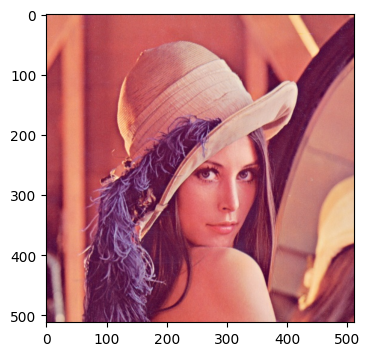

In [23]:
plt.figure(figsize=[4, 4])
plt.imshow(img[:, :, ::-1]);

In [24]:
img_size = np.array(img.shape).prod()
print('Размер изображения: {:.3f} МБ'.format(img_size / 1024 / 1024))

Размер изображения: 0.750 МБ


Как видим в несжатом представлении изображение занимает существенно больше памяти. Рассчитаем коэффициент сжатия:

In [25]:
print('Коэффициент сжатия: {:.1f}'.format(img_size / img_buf_size))

Коэффициент сжатия: 7.3


Изображение можно сжать обратно следующим образом:

In [26]:
ok, img_buf_2 = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 10))

In [27]:
img_buf_2_size = np.array(img_buf_2.shape).prod()
print('Размер сжатого изображения: {:.3f} МБ'.format(img_buf_2_size / 1024 / 1024))

Размер сжатого изображения: 0.009 МБ


Алгоритм сжатия определяется указанным расширением, кроме того имеет различные параметры: https://vovkos.github.io/doxyrest-showcase/opencv/sphinxdoc/enum_cv_ImwriteFlags.html. Наиболее используемым является качество сжатия.

Декодируем сжатое с качеством 10 изображение:

In [28]:
img_2 = cv2.imdecode(img_buf_2, cv2.IMREAD_COLOR)

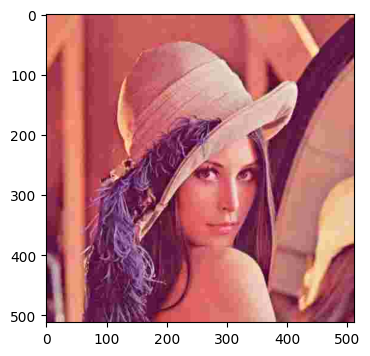

In [29]:
plt.figure(figsize=[4, 4])
plt.imshow(img_2[:, :, ::-1]);

## Вопрос

- Зачем может понадобиться хранить в оперативной памяти сжатые изображения?